<a href="https://colab.research.google.com/github/duwi27sulis/Peramalan-LSTM_75-25/blob/main/Eksplorasi_Data_LSTM_75_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import statsmodels.api as sm

In [7]:
# Input Data
url = "https://raw.githubusercontent.com/duwi27sulis/Analisis_Data_LSTM/main/Ekspor-Migas-2001-2023.csv"
df = pd.read_csv(url, sep=",")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
data = df['Nilai Ekspor Migas'].values.astype('float32').reshape(-1, 1)

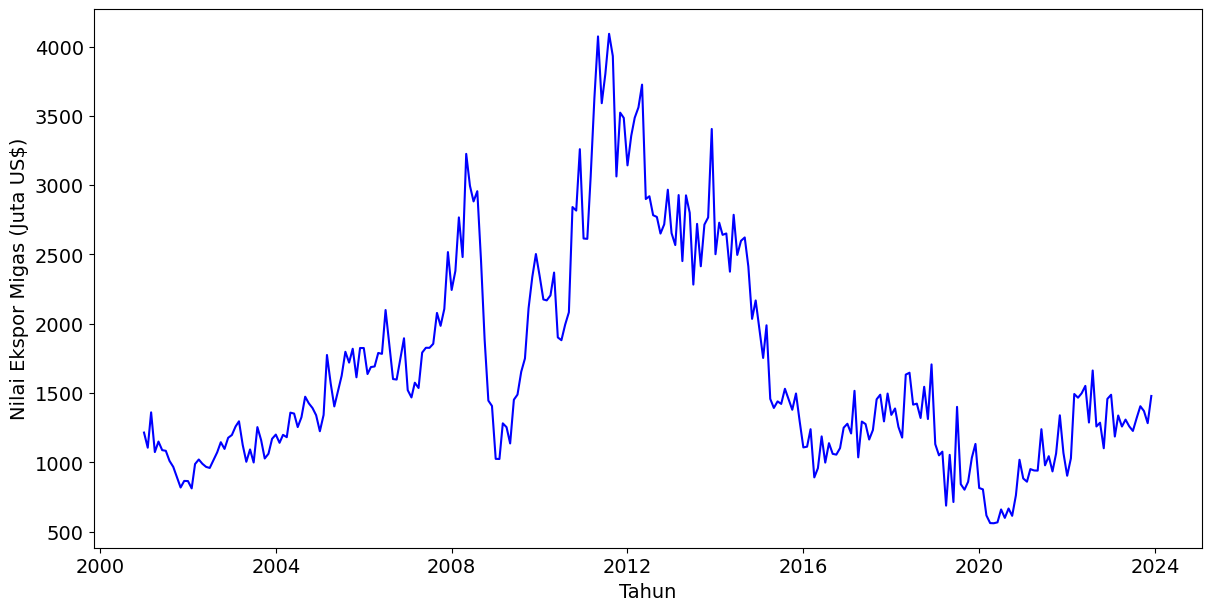

In [8]:
# Line plot data time series
from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index=0):
    xs = series['Tanggal']
    ys = series['Nilai Ekspor Migas']

    plt.plot(xs, ys, label=series_name, color='blue')

fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')
df_sorted = df.sort_values('Tanggal', ascending=True)
_plot_series(df_sorted, '')

# Menambahkan bingkai kotak
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

sns.despine(fig=fig, ax=ax, top=False, right=False, bottom=False, left=False)
plt.xlabel('Tahun', fontsize = 14)
_ = plt.ylabel('Nilai Ekspor Migas (Juta US$)', fontsize = 14)

# Set the font size for x and y tick labels
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.show()

In [9]:
# Statistik Deskriptif
df['Nilai Ekspor Migas'].describe()

,Nilai Ekspor Migas
count,276.000000
mean,1676.342029
std,768.702279
min,560.900000
25%,1122.675000
50%,1422.750000
75%,2101.000000
max,4091.600000


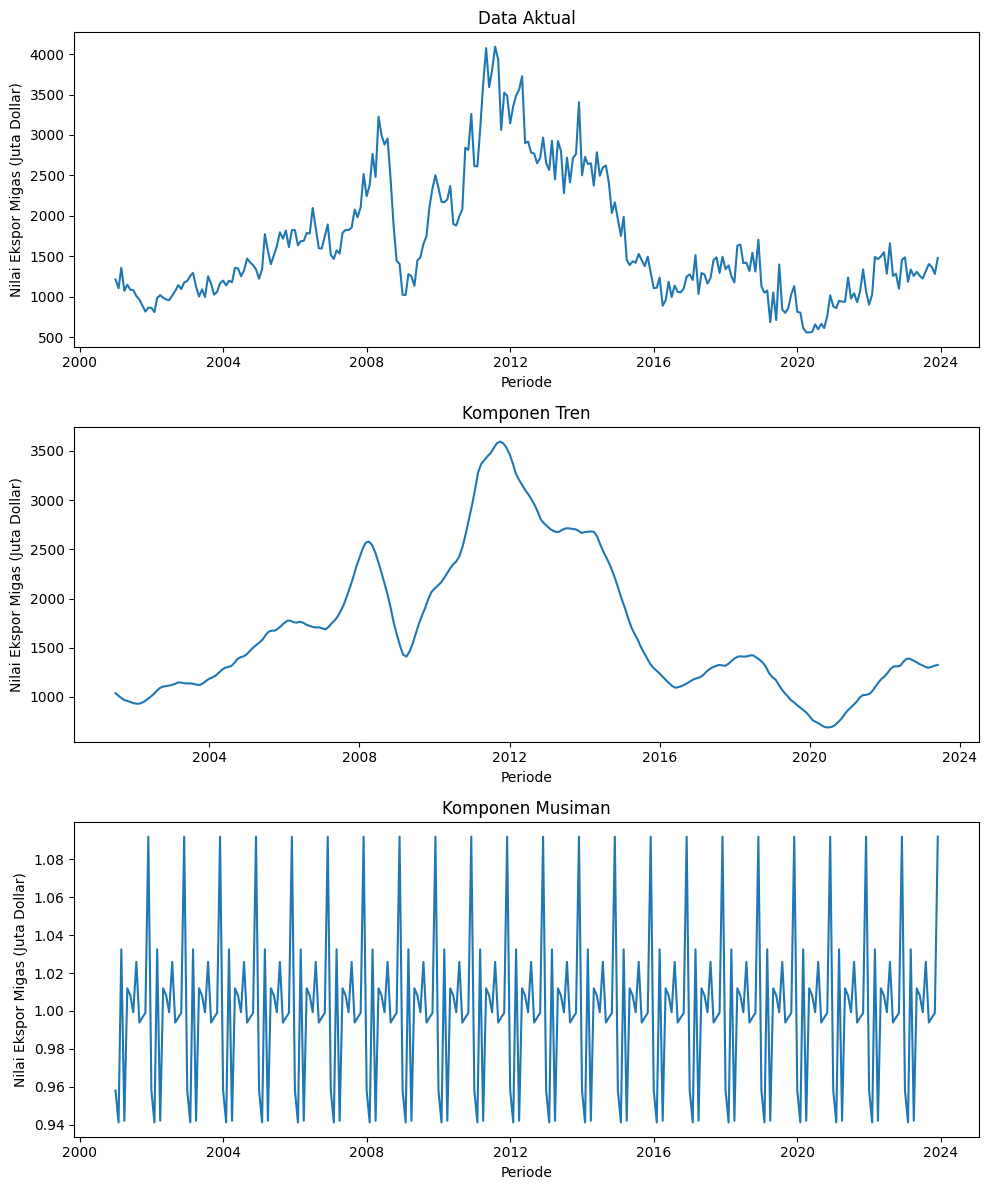

In [10]:
# Menyiapkan data untuk dekomposisi
df.set_index('Tanggal', inplace=True)
dt = df['Nilai Ekspor Migas'].astype('float32')

def dekomposisi(dt):
    # Melakukan dekomposisi musiman pada data nilai ekspor migas
    decomposition = sm.tsa.seasonal_decompose(dt, model="multiplicative")

    # Mendapatkan komponen trend dan seasonal
    trend = decomposition.trend
    seasonal = decomposition.seasonal

    return trend, seasonal

def plot_dekomposisi(dt, trend, seasonal):
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    axs[0].plot(dt.index, dt)
    axs[0].set_title('Data Aktual')
    axs[0].set_ylabel('Nilai Ekspor Migas (Juta Dollar)')
    axs[0].set_xlabel('Periode')

    axs[1].plot(trend.index, trend)
    axs[1].set_title('Komponen Tren')
    axs[1].set_ylabel('Nilai Ekspor Migas (Juta Dollar)')
    axs[1].set_xlabel('Periode')

    axs[2].plot(seasonal.index, seasonal)
    axs[2].set_title('Komponen Musiman')
    axs[2].set_ylabel('Nilai Ekspor Migas (Juta Dollar)')
    axs[2].set_xlabel('Periode')

    # Mengatur jarak antar subplot
    plt.tight_layout()

    # Menampilkan plot
    plt.show()

# Melakukan dekomposisi pada data ekspor migas
trend, seasonal = dekomposisi(dt)

# Plot hasil dekomposisi
plot_dekomposisi(dt, trend, seasonal)

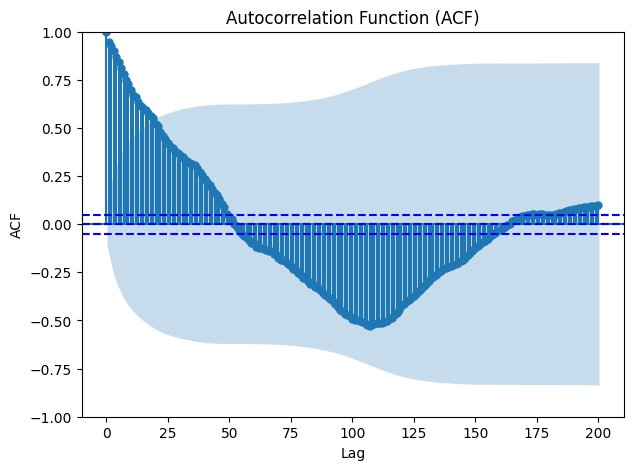

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Membuat plot ACF
fig, ax = plt.subplots(figsize=(7, 5))
plot_acf(df['Nilai Ekspor Migas'], lags=200, ax=ax)

# Menyesuaikan tampilan plot
ax.set_xlabel('Lag')
ax.set_ylabel('ACF')

# Menambahkan garis putus-putus untuk signifikansi
ax.axhline(y=0, color='blue', linestyle='--')
ax.axhline(y=-0.05, color='blue', linestyle='--')
ax.axhline(y=0.05, color='blue', linestyle='--')

plt.title('Autocorrelation Function (ACF)')
plt.show()

In [12]:
# Uji kestasioneran (Augmented Dickey-Fuller Test)
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

result_original = sm.tsa.adfuller(data)
print('p-value :', result_original[1])
print('Critical :')
for key, value in result_original[4].items():
    print(f'   {key}: {value}')

p-value : 0.2658560561741424
Critical :
   1%: -3.4544435065994437
   5%: -2.8721468827772774
   10%: -2.572422013959188


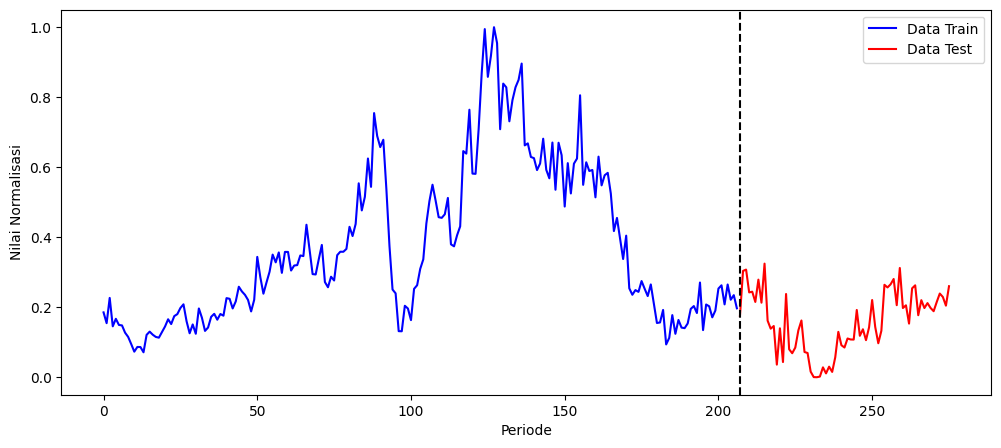

In [13]:
from sklearn.preprocessing import MinMaxScaler
# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Fungsi untuk membuat dataset
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps), 0])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

# Prepare data
time_steps = 1
X, y = create_dataset(scaled_data, time_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size, :], X[train_size:, :]
y_train, y_test = y[:train_size], y[train_size:]

# Pembagian Data Setelah Normalisasi Data
plt.figure(figsize=(12, 5))

bagi_train = int(len(scaled_data) * 0.75)
bagi_test = len(scaled_data) - bagi_train
Xnorm_train, Xnorm_test = scaled_data[:bagi_train, :], scaled_data[bagi_train:, :]

plt.plot(range(len(Xnorm_train)), Xnorm_train, color='blue', label='Data Train')
plt.plot(range(len(Xnorm_train), len(Xnorm_train) + len(Xnorm_test)), Xnorm_test, color='red', label='Data Test')

# Menambahkan garis potong-potong pada pembagian data
plt.axvline(x=bagi_train, color='black', linestyle='--')

# Menambahkan label dan legenda
plt.xlabel('Periode')
plt.ylabel('Nilai Normalisasi')
plt.legend()
plt.show()

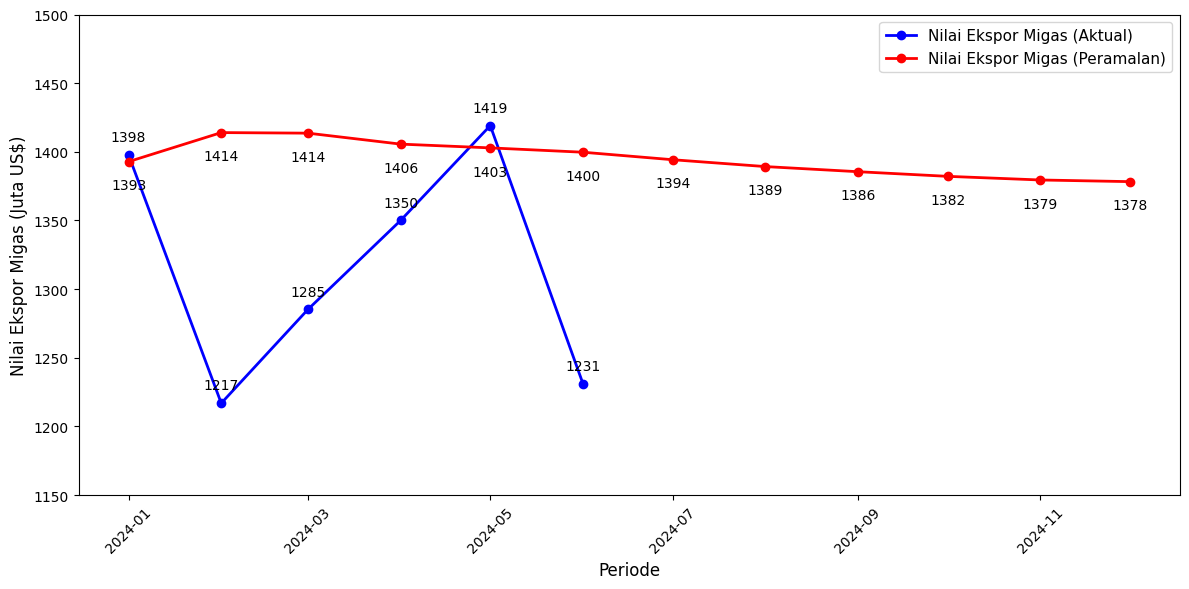

In [14]:
# Plot Peramalan dengan Data Aktual Terkini (2024)
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# URL dataset
link_prml = "https://raw.githubusercontent.com/duwi27sulis/Peramalan-LSTM_85-15/main/forecast_data75_h1t12.csv"
link_akt = "https://raw.githubusercontent.com/duwi27sulis/Analisis_Data_LSTM/main/Data%20Migas%20Juni%202024.csv"

# Memuat dataset
df_prml = pd.read_csv(link_prml)
df_akt = pd.read_csv(link_akt)

# Mengubah kolom 'Tanggal' menjadi tipe datetime
df_prml['Tanggal'] = pd.to_datetime(df_prml['Tanggal'])
df_akt['Tanggal'] = pd.to_datetime(df_akt['Tanggal'])

# Mengatur ukuran gambar
plt.figure(figsize=(12, 6))

# Plot dataset aktual
plt.plot(df_akt['Tanggal'], df_akt['Nilai Ekspor Migas'], label='Nilai Ekspor Migas (Aktual)', color='blue', linewidth=2, marker='o')

# Plot dataset peramalan
plt.plot(df_prml['Tanggal'], df_prml['Nilai Ekspor Migas (Peramalan)'], label='Nilai Ekspor Migas (Peramalan)', color='red', linewidth=2, marker='o')

# Menambahkan nilai pada setiap titik
# Menambahkan nilai pada setiap titik
for i, txt in enumerate(df_akt['Nilai Ekspor Migas']):
    plt.annotate(f'{txt:.0f}', (df_akt['Tanggal'][i], df_akt['Nilai Ekspor Migas'][i]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

for i, txt in enumerate(df_prml['Nilai Ekspor Migas (Peramalan)']):
    plt.annotate(f'{txt:.0f}', (df_prml['Tanggal'][i], df_prml['Nilai Ekspor Migas (Peramalan)'][i]),
                 textcoords="offset points", xytext=(0,-20), ha='center', fontsize=10)

# Menambahkan label sumbu dan judul dengan ukuran font
plt.xlabel('Periode', fontsize=12)
plt.ylabel('Nilai Ekspor Migas (Juta US$)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Menampilkan legenda dengan ukuran font
plt.legend(fontsize=11)

# Mengatur rentang sumbu y untuk mengecilkan skala nilai
plt.ylim(1150, 1500)

# Menampilkan plot
plt.tight_layout()
plt.show()